In [26]:
import scipy.io as sio
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from umap.umap_ import UMAP
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
#load al preprocess all data
soundData = sio.loadmat('data/soundData_small.mat')['sound_data_small'] #open data .mat file
soundData =  pd.DataFrame(soundData)#get only actual data and convert to dataframe
soundData = (soundData-soundData.mean())/soundData.std()#normalisation

soundData_HL = sio.loadmat('data/soundData_HL_small.mat')['sound_data_small'] #open data .mat file
soundData_HL =  pd.DataFrame(soundData_HL)#get only actual data and convert to dataframe
soundData_HL = (soundData_HL-soundData_HL.mean())/soundData_HL.std()#normalisation

soundData_CI = sio.loadmat('data/soundData_CI_small.mat')['sound_data_small'] #open data .mat file
soundData_CI =  pd.DataFrame(soundData_CI)#get only actual data and convert to dataframe
soundData_CI = (soundData_CI-soundData_CI.mean())/soundData_CI.std()#normalisation

soundData_afterCI = sio.loadmat('data/soundData_afterCI_small.mat')['sound_data_small'] #open data .mat file
soundData_afterCI =  pd.DataFrame(soundData_afterCI)#get only actual data and convert to dataframe
soundData_afterCI = (soundData_afterCI-soundData_afterCI.mean())/soundData_afterCI.std()#normalisation



In [3]:
# soundData = soundData.iloc[:,0:14]
# soundData_HL = soundData_HL.iloc[:,0:14]
# soundData_CI = soundData_CI.iloc[:,0:14]
# soundData_afterCI = soundData_afterCI.iloc[:,0:14]


In [4]:
# labels = pd.DataFrame(sio.loadmat('Stim288.mat')['labels'][0])
labels = sio.loadmat('Stim288.mat')['labels'][0]
# labels = labels.transpose()
pd.DataFrame(labels)

# soundLabels = pd.DataFrame(columns = ['label'])
# for label in labels:
#     soundLabels.loc[len(soundLabels.index)] = label#somehow the original array isnt good for svm, so i copy the data manually, idk why this does work
# soundLabels = np.asarray(soundLabels).ravel() #flatten the array so numpy is happy

#somehow the original array isnt good for svm, so i copy the data manually, idk why this does work
soundLabels=[]
for label in labels:
    soundLabels.append(label[0])
# print(np.asarray(labels))
print(soundLabels)

['speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'speech', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'voice', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal', 'animal

In [5]:
# umap_4d = UMAP(n_components=4, init='random', random_state=0)
# data = np.vstack((soundData,soundData_HL,soundData_CI, soundData_afterCI))
# proj_4d = umap_4d.fit_transform(data[:,0:14])
# proj_4d = (proj_4d-proj_4d.mean())/proj_4d.std()#normalisation

# source = np.concatenate((['healthy']*288,['HL']*288,['CI']*288,['afterCI']*288)) 

# soundData_umap = np.hstack((soundData, proj_4d[0:288]))

# # proj_4d_HL = umap_4d.fit_transform(soundData_HL[:,0:14])
# # proj_4d_HL = (proj_4d_HL-proj_4d_HL.mean())/proj_4d_HL.std()#normalisation
# soundData_umap_HL = np.hstack((soundData_HL, proj_4d[288:2*288]))

# # proj_4d_CI = umap_4d.fit_transform(soundData_CI[:,0:14])
# # proj_4d_CI = (proj_4d_CI-proj_4d_CI.mean())/proj_4d_CI.std()#normalisation
# soundData_umap_CI = np.hstack((soundData_CI, proj_4d[2*288:3*288]))

# # proj_4d_afterCI = umap_4d.fit_transform(soundData_afterCI[:,0:14])
# # proj_4d_afterCI = (proj_4d_afterCI-proj_4d_afterCI.mean())/proj_4d_afterCI.std()#normalisation
# soundData_umap_afterCI = np.hstack((soundData_afterCI, proj_4d[3*288:4*288]))

In [16]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(soundData, soundLabels, test_size=0.25, shuffle = True, stratify=soundLabels)
print(pd.DataFrame(y_train, columns = ["label"]).groupby(["label"]).size())

#create svm classifier
# clf = SVC(kernel='linear')
clf = LogisticRegression(solver='liblinear', random_state=0)

#fit svm on training data
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Healthy class Accuracy (normalized): " + str(accuracy))

label
animal    36
music     36
nature    36
speech    36
tools     36
voice     36
dtype: int64
Healthy class Accuracy (normalized): 0.4722222222222222


In [17]:
#k-fold cross validation
k = 4
kf = KFold(n_splits=k, random_state=None, shuffle = True)
result = cross_val_score(clf , soundData, soundLabels, cv = kf)
 
print("Healthy class avg accuracy from CV: {}".format(result.mean()))

Healthy class avg accuracy from CV: 0.5590277777777777


In [18]:
#accuracy on other scenarios
#create svm classifier with all healthy data instead of train set
clf2 = clf
#fit svm on training data
clf2.fit(soundData, soundLabels)

predictions_HL = clf2.predict(soundData_HL)
accuracy_HL = accuracy_score(soundLabels, predictions_HL)
print("Hearing loss class Accuracy: " + str(accuracy_HL))

predictions_CI = clf2.predict(soundData_CI)
accuracy_CI = accuracy_score(soundLabels, predictions_CI)
print("Cochlear implant class Accuracy: " + str(accuracy_CI))

predictions_afterCI = clf2.predict(soundData_afterCI)
accuracy_afterCI = accuracy_score(soundLabels, predictions_afterCI)
print("Cochlear implant after Hearing loss class Accuracy: " + str(accuracy_afterCI))

Hearing loss class Accuracy: 0.4270833333333333
Cochlear implant class Accuracy: 0.3888888888888889
Cochlear implant after Hearing loss class Accuracy: 0.7291666666666666


<bound method NDFrame.head of        speech     voice    animal     music    nature     tools
14   0.165048 -0.112832  0.486888 -0.666083  0.249995  0.231113
15   0.110607 -0.261404  0.458690  0.459725 -0.560119 -0.772892
16   0.013599  0.007985  0.362774 -0.153117  0.119781 -0.421710
17   0.053623  0.229489 -0.174897 -0.341905  0.205535  0.142145
18  -0.367888  0.506994 -0.270209  0.236910  0.156043  0.070077
..        ...       ...       ...       ...       ...       ...
107 -0.045787 -0.402262  0.117574  0.114370  0.121094 -0.284132
108  0.186401 -0.146311  0.150730  0.113244  0.531375 -0.990278
109 -0.648530  0.280806 -0.021604 -0.204509  0.550067 -0.426401
110 -0.035130 -0.835759  0.808428 -0.150807  0.045729 -0.056997
111 -0.240076  0.107603 -0.279152  0.490202  0.162460 -0.178230

[98 rows x 6 columns]>


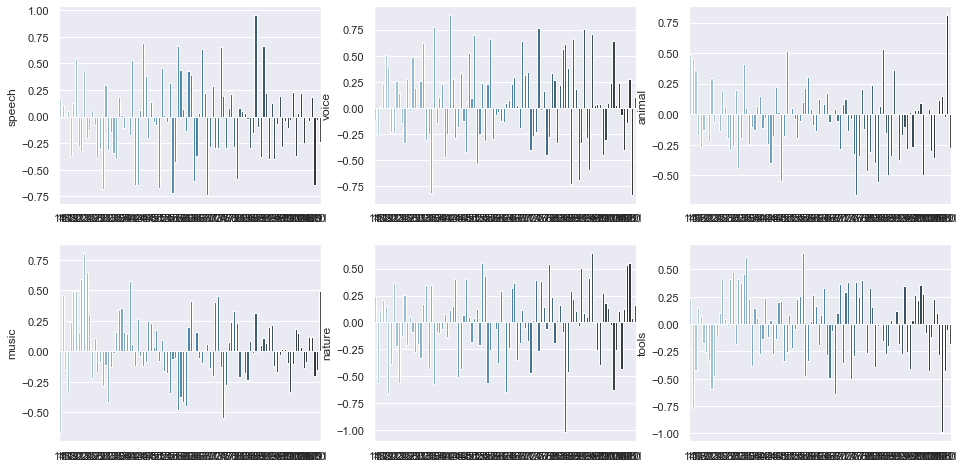

In [79]:
soundClasses = ["speech", "voice", "animal", "music", "nature", "tools"]
coefficients = pd.DataFrame(clf2.coef_.T, columns = soundClasses).iloc[14:,:]

print(coefficients.head)
# fig, axes = plt.subplots(2, 3)
sns.set(rc={"figure.figsize":(16, 8)}) #width=8, height=4


f = plt.figure()
for i in range(6):
    f.add_subplot(2, 3, i+1)
    sns.barplot(data=coefficients, x=coefficients.iloc[:,i].index, y = soundClasses[i], palette="Blues_d")

# plt.show()
f.savefig("figures/out.png") 
    # fig = sns.lineplot(data=coefficients[1,:])
   

In [ ]:
print(coefficients[1,:].shape)


coefficients.iloc[:,1].head

InvalidIndexError: (1, slice(None, None, None))